In [1]:
#Simple Perceptron
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return np.where(x > 0, 1, 0)

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, training_inputs, labels):
        print("Initial Weights:", self.weights)
        print("Initial Bias:", self.bias)
        print("--------------------------------------------------")

        for epoch in range(self.epochs):
            correct = 0
            print(f"Epoch {epoch+1}:")
            for i, (inputs, label) in enumerate(zip(training_inputs, labels)):
                prediction = self.predict(inputs)
                error = label - prediction

                # Update rule
                self.weights += self.lr * error * inputs
                self.bias += self.lr * error

                # Count correct predictions
                if prediction == label:
                    correct += 1

                # Display update info
                print(f"  Sample {i+1}: Input={inputs}, Label={label}, Pred={prediction}, Error={error}")
                print(f"    Updated Weights: {self.weights}")
                print(f"    Updated Bias: {self.bias}")

            # Accuracy after each epoch
            accuracy = correct / len(labels) * 100
            print(f"Epoch {epoch+1} Accuracy: {accuracy:.2f}%")
            print("--------------------------------------------------")

            if accuracy == 100:
                break

        print("Training Complete!")
        print("Final Weights:", self.weights)
        print("Final Bias:", self.bias)
        print("--------------------------------------------------")

# Example usage
training_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 0, 0, 1])  # AND logic gate

perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.train(training_inputs, labels)

# Testing phase
print("Testing Results:")
predictions = []
for inputs in training_inputs:
    pred = perceptron.predict(inputs)
    predictions.append(pred)
    print(f"Input: {inputs}, Predicted: {pred}")

# Final accuracy
final_acc = np.mean(predictions == labels) * 100
print(f"\nFinal Accuracy on Training Data: {final_acc:.2f}%")


Initial Weights: [0. 0.]
Initial Bias: 0.0
--------------------------------------------------
Epoch 1:
  Sample 1: Input=[0 0], Label=0, Pred=0, Error=0
    Updated Weights: [0. 0.]
    Updated Bias: 0.0
  Sample 2: Input=[0 1], Label=0, Pred=0, Error=0
    Updated Weights: [0. 0.]
    Updated Bias: 0.0
  Sample 3: Input=[1 0], Label=0, Pred=0, Error=0
    Updated Weights: [0. 0.]
    Updated Bias: 0.0
  Sample 4: Input=[1 1], Label=1, Pred=0, Error=1
    Updated Weights: [0.1 0.1]
    Updated Bias: 0.1
Epoch 1 Accuracy: 75.00%
--------------------------------------------------
Epoch 2:
  Sample 1: Input=[0 0], Label=0, Pred=1, Error=-1
    Updated Weights: [0.1 0.1]
    Updated Bias: 0.0
  Sample 2: Input=[0 1], Label=0, Pred=1, Error=-1
    Updated Weights: [0.1 0. ]
    Updated Bias: -0.1
  Sample 3: Input=[1 0], Label=0, Pred=0, Error=0
    Updated Weights: [0.1 0. ]
    Updated Bias: -0.1
  Sample 4: Input=[1 1], Label=1, Pred=0, Error=1
    Updated Weights: [0.2 0.1]
    Updated 

In [2]:
#Perceptron using perceptron module
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# AND logic gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # inputs
y = np.array([0, 0, 0, 1])                  # output

# create and train perceptron model
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X, y)

# test
predictions = model.predict(X)
print("Predictions:", predictions)

# print weights and bias
print("Weights:", model.coef_)
print("Bias:", model.intercept_)

# calculate and print accuracy
accuracy = accuracy_score(y, predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Predictions: [0 0 0 1]
Weights: [[0.2 0.2]]
Bias: [-0.2]
Accuracy: 100.00%


In [3]:
# Perceptron with activation Function with AND, OR (linear data)
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
        self.lr = learning_rate
        self.epochs = epochs

    # Activation Function: Step function
    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return self.activation(linear_output)

    def train(self, X, y):
        for epoch in range(self.epochs):
            correct=0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                if(label==prediction):
                    correct+=1
                else:
                    error = label - prediction
                    self.weights += self.lr * error * inputs
                    self.bias += self.lr * error
            accuracy=correct/len(y)*100
            print(f'epoch {epoch+1} -> accuracy:{accuracy}')
            if accuracy==100:
                break

# AND Logic Gate (Linear)
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

and_perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
and_perceptron.train(X_and, y_and)
print("AND Gate Results")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")
print(f"Weights: {and_perceptron.weights}, Bias: {and_perceptron.bias}\n")

# OR Logic Gate (Linear)
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

or_perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
or_perceptron.train(X_or, y_or)
print("OR Gate Results")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")
print(f"Weights: {or_perceptron.weights}, Bias: {or_perceptron.bias}\n")

epoch 1 -> accuracy:50.0
epoch 2 -> accuracy:25.0
epoch 3 -> accuracy:25.0
epoch 4 -> accuracy:100.0
AND Gate Results
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1
Weights: [0.2 0.1], Bias: -0.20000000000000004

epoch 1 -> accuracy:50.0
epoch 2 -> accuracy:50.0
epoch 3 -> accuracy:75.0
epoch 4 -> accuracy:100.0
OR Gate Results
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1
Weights: [0.1 0.1], Bias: -0.1



In [4]:
# MLP with single hidden Layer (with various number of neurons) with XOR(Non-linear)
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# MLP Class (Single Hidden Layer)
class MLP:
    def __init__(self, input_size, hidden_neurons, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_neurons = hidden_neurons
        self.output_size = output_size
        self.lr = learning_rate
        self.epochs = epochs

        # Weight initialization
        self.w1 = np.random.uniform(-1, 1, (input_size, hidden_neurons))
        self.b1 = np.zeros((1, hidden_neurons))
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        error = y - self.a2
        d_output = error * sigmoid_derivative(self.a2)

        error_hidden = np.dot(d_output, self.w2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Weight updates
        self.w2 += self.lr * np.dot(self.a1.T, d_output)
        self.b2 += self.lr * np.sum(d_output, axis=0, keepdims=True)
        self.w1 += self.lr * np.dot(X.T, d_hidden)
        self.b1 += self.lr * np.sum(d_hidden, axis=0, keepdims=True)

    def train(self, X, y):
        for epoch in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

            if (epoch + 1) % 2000 == 0:
                loss = np.mean(np.square(y - self.a2))
                print(f"Epoch {epoch+1}, Loss: {loss:.6f}")

    def predict(self, X):
        return np.round(self.forward(X))

# Datasets: XOR Truth table
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([[0], [1], [1], [0]])


# Test MLP with Different Hidden Neuron Counts
for hidden in [1, 2, 3, 4, 5]:
    print(f"\n Training MLP for XOR Gate with {hidden} Hidden Neurons")
    mlp = MLP(input_size=2, hidden_neurons=hidden, output_size=1, learning_rate=0.5, epochs=10000)
    mlp.train(X, y_xor)
    
    preds = mlp.predict(X)
    print("Predictions:")
    for i, inp in enumerate(X):
        print(f"  Input: {inp}, Output: {preds[i][0]:.0f}")
    
    acc = np.mean(preds == y_xor) * 100
    print(f"Accuracy: {acc:.2f}%")



 Training MLP for XOR Gate with 1 Hidden Neurons
Epoch 2000, Loss: 0.250000
Epoch 4000, Loss: 0.246909
Epoch 6000, Loss: 0.168613
Epoch 8000, Loss: 0.167541
Epoch 10000, Loss: 0.167226
Predictions:
  Input: [0 0], Output: 0
  Input: [0 1], Output: 1
  Input: [1 0], Output: 1
  Input: [1 1], Output: 1
Accuracy: 75.00%

 Training MLP for XOR Gate with 2 Hidden Neurons
Epoch 2000, Loss: 0.003883
Epoch 4000, Loss: 0.001045
Epoch 6000, Loss: 0.000587
Epoch 8000, Loss: 0.000405
Epoch 10000, Loss: 0.000308
Predictions:
  Input: [0 0], Output: 0
  Input: [0 1], Output: 1
  Input: [1 0], Output: 1
  Input: [1 1], Output: 0
Accuracy: 100.00%

 Training MLP for XOR Gate with 3 Hidden Neurons
Epoch 2000, Loss: 0.003469
Epoch 4000, Loss: 0.000924
Epoch 6000, Loss: 0.000516
Epoch 8000, Loss: 0.000355
Epoch 10000, Loss: 0.000270
Predictions:
  Input: [0 0], Output: 0
  Input: [0 1], Output: 1
  Input: [1 0], Output: 1
  Input: [1 1], Output: 0
Accuracy: 100.00%

 Training MLP for XOR Gate with 4 Hid

In [5]:
# MLP with single hidden Layer (with various number of neurons) with XOR(Non-linear)
#Using built-in Module
from sklearn.neural_network import MLPClassifier
import numpy as np

# Dataset — Example: OR logic gate (Linear separable)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])  # XOR gate output

# Test MLP with Different Hidden Neuron Counts
for hidden_neurons in [1, 2, 3, 4]:
    print(f"\nTraining MLP with {hidden_neurons} hidden neurons...")

    # Create and train MLP
    mlp = MLPClassifier(hidden_layer_sizes=(hidden_neurons,),
                        activation='tanh',          
                        solver='adam',
                        learning_rate_init=0.1,     
                        max_iter=10000,
                        random_state=42)

    mlp.fit(X, y)

    # Predictions and accuracy
    preds = mlp.predict(X)
    accuracy = mlp.score(X, y) * 100

    # Display results
    print("Predictions:")
    for i, inp in enumerate(X):
        print(f" Input: {inp}, Output: {preds[i]}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Weights (first layer):\n{mlp.coefs_[0]}")
    print(f"Weights (second layer):\n{mlp.coefs_[1]}")
    print(f"Biases:\n{mlp.intercepts_}")



Training MLP with 1 hidden neurons...
Predictions:
 Input: [0 0], Output: 0
 Input: [0 1], Output: 1
 Input: [1 0], Output: 1
 Input: [1 1], Output: 1
Accuracy: 75.00%
Weights (first layer):
[[4.65488787]
 [5.70506255]]
Weights (second layer):
[[2.67719644]]
Biases:
[array([-1.42264739]), array([-1.9816375])]

Training MLP with 2 hidden neurons...
Predictions:
 Input: [0 0], Output: 0
 Input: [0 1], Output: 1
 Input: [1 0], Output: 1
 Input: [1 1], Output: 0
Accuracy: 100.00%
Weights (first layer):
[[ 3.2323288   5.47473   ]
 [-3.51047757 -4.42005663]]
Weights (second layer):
[[-5.65510552]
 [ 5.45564502]]
Biases:
[array([ 1.93246072, -3.09300801]), array([5.2426612])]

Training MLP with 3 hidden neurons...
Predictions:
 Input: [0 0], Output: 0
 Input: [0 1], Output: 1
 Input: [1 0], Output: 1
 Input: [1 1], Output: 0
Accuracy: 100.00%
Weights (first layer):
[[-2.60397085  3.94852085  3.28837075]
 [ 2.37460905 -3.72350311 -3.67003244]]
Weights (second layer):
[[-1.42073239]
 [-5.76622

In [2]:
# MLP on MNIST dataset and display its train and test data score. 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the MNIST dataset (70,000 images of handwritten digits)
mnist = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
X, y = mnist.drop(columns="label"), mnist['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Creating MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(60,100),  # Two hidden layers with 60 and 100 neurons
    activation='relu',          # Activation function
    solver='adam',              # Optimization algorithm
    max_iter=20,                # Number of epochs
    random_state=42,            # Random state
    verbose=True                # Display training progress
)

# Train the model
print("\nTraining MLP model...")
mlp.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculating accuracy score of both train and test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)



Training MLP model...
Iteration 1, loss = 0.42706647
Iteration 2, loss = 0.15304902
Iteration 3, loss = 0.10372674
Iteration 4, loss = 0.07642148
Iteration 5, loss = 0.05946572
Iteration 6, loss = 0.04573764
Iteration 7, loss = 0.03732249
Iteration 8, loss = 0.02919073
Iteration 9, loss = 0.02266216
Iteration 10, loss = 0.01921134
Iteration 11, loss = 0.01515307
Iteration 12, loss = 0.01467021
Iteration 13, loss = 0.01060243
Iteration 14, loss = 0.00867681
Iteration 15, loss = 0.00662656
Iteration 16, loss = 0.00637811
Iteration 17, loss = 0.00729908
Iteration 18, loss = 0.01676790
Iteration 19, loss = 0.01775494
Iteration 20, loss = 0.01214385


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 0.9987291666666667
Testing Accuracy: 0.9706666666666667


Relation between Learning Rate and Loss:

Learning Rate: 0.0001  | Final Loss: 0.48356 | Test Accuracy: 86.00%
Learning Rate: 0.001   | Final Loss: 0.26963 | Test Accuracy: 86.00%
Learning Rate: 0.01    | Final Loss: 0.23110 | Test Accuracy: 88.00%
Learning Rate: 0.1     | Final Loss: 0.21540 | Test Accuracy: 89.00%
Learning Rate: 0.5     | Final Loss: 0.21463 | Test Accuracy: 89.00%


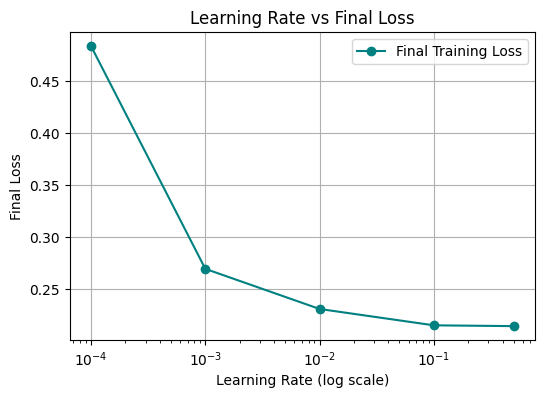

Relation between Iterations and Loss:

Iterations : 0 | Loss: 0.81561 | Test Accuracy: 89.00%
Iterations : 30 | Loss: 0.59036 | Test Accuracy: 89.00%
Iterations : 60 | Loss: 0.49590 | Test Accuracy: 89.00%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iterations : 90 | Loss: 0.43480 | Test Accuracy: 89.00%
Iterations : 120 | Loss: 0.38887 | Test Accuracy: 89.00%
Iterations : 150 | Loss: 0.35401 | Test Accuracy: 89.00%
Iterations : 180 | Loss: 0.32698 | Test Accuracy: 89.00%
Iterations : 210 | Loss: 0.30705 | Test Accuracy: 89.00%
Iterations : 240 | Loss: 0.29239 | Test Accuracy: 89.00%
Iterations : 270 | Loss: 0.28138 | Test Accuracy: 89.00%
Iterations : 300 | Loss: 0.27285 | Test Accuracy: 89.00%


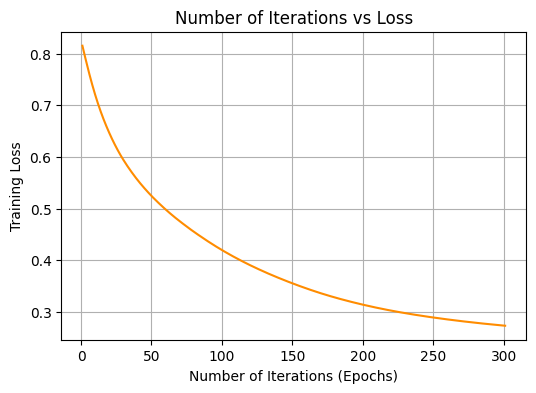

In [8]:
# Relation between Learning Rate & Loss, and Iterations & Loss

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Create a non-linear dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LEARNING RATE vs LOSS
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
final_losses = []
test_accuracies = []

print("Relation between Learning Rate and Loss:\n")

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(10,),
                        activation='relu',
                        solver='sgd',
                        learning_rate_init=lr,
                        max_iter=2000,
                        random_state=42)
    
    mlp.fit(X_train, y_train)
    final_losses.append(mlp.loss_)
    test_accuracies.append(mlp.score(X_test, y_test))
    
    print(f"Learning Rate: {lr:<7} | Final Loss: {mlp.loss_:.5f} | Test Accuracy: {mlp.score(X_test, y_test)*100:.2f}%")

# Learning Rate vs Final Loss
plt.figure(figsize=(6,4))
plt.plot(learning_rates, final_losses, marker='o', color='teal', label="Final Training Loss")
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Final Loss")
plt.title("Learning Rate vs Final Loss")
plt.grid(True)
plt.legend()
plt.show()


# ITERATIONS vs LOSS
# Fix learning rate and observe how loss decreases with iterations
mlp_iter = MLPClassifier(hidden_layer_sizes=(10,),
                         activation='relu',
                         solver='sgd',
                         learning_rate_init=0.01,   # fixed learning rate
                         max_iter=1,
                         warm_start=True,           # continue training each loop
                         random_state=42)

loss_curve = []
iterations = 300

print("Relation between Iterations and Loss:\n")
for i in range(iterations+1):
    mlp_iter.fit(X_train, y_train)
    loss_curve.append(mlp_iter.loss_)
    if i%30==0:
        print(f"Iterations : {i} | Loss: {mlp_iter.loss_:.5f} | Test Accuracy: {mlp.score(X_test, y_test)*100:.2f}%")


 

# Plot: Number of Iterations vs Loss
plt.figure(figsize=(6,4))
plt.plot(range(1, iterations+2), loss_curve, color='darkorange')
plt.xlabel("Number of Iterations (Epochs)")
plt.ylabel("Training Loss")
plt.title("Number of Iterations vs Loss")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


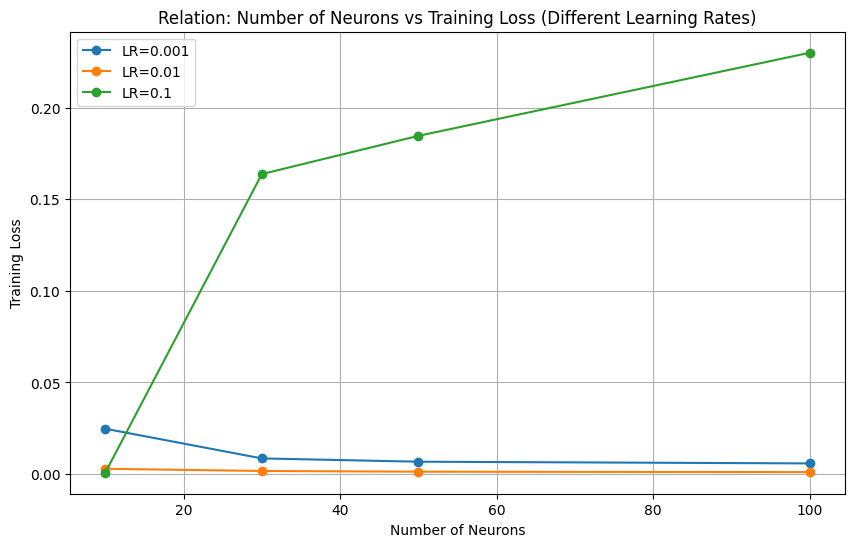

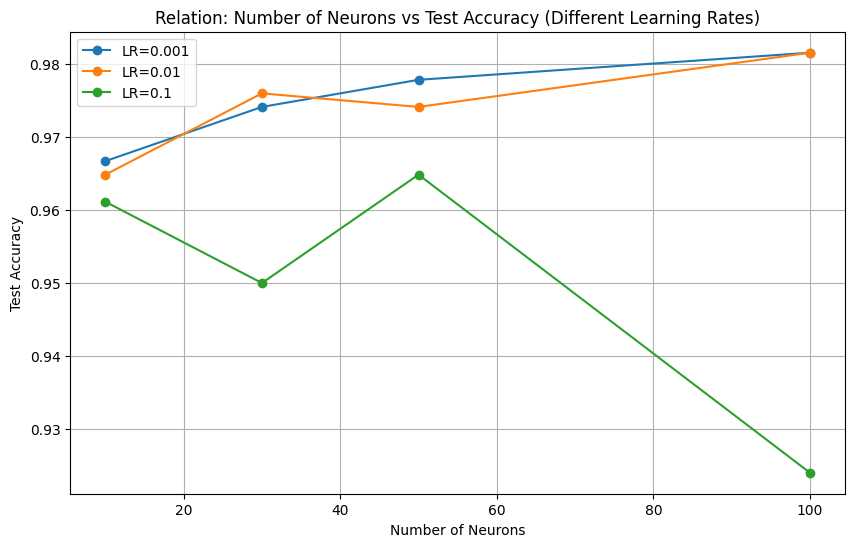

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


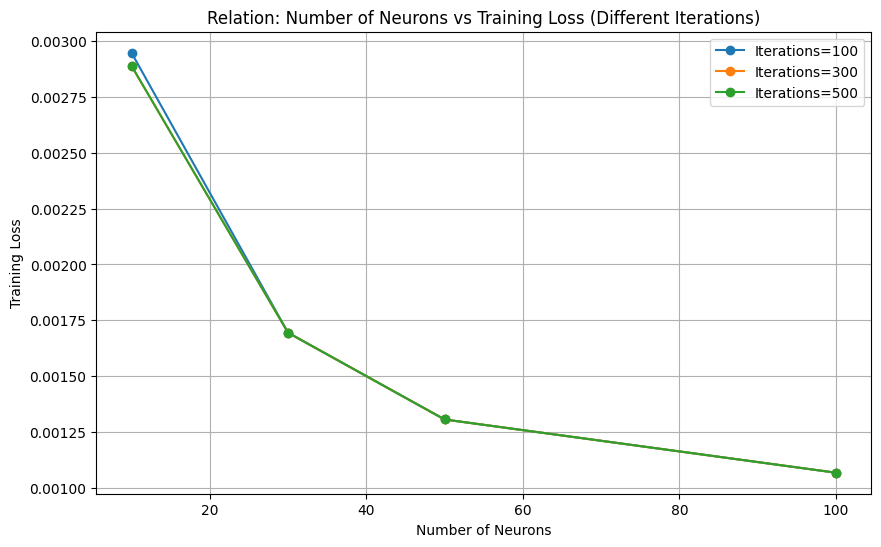

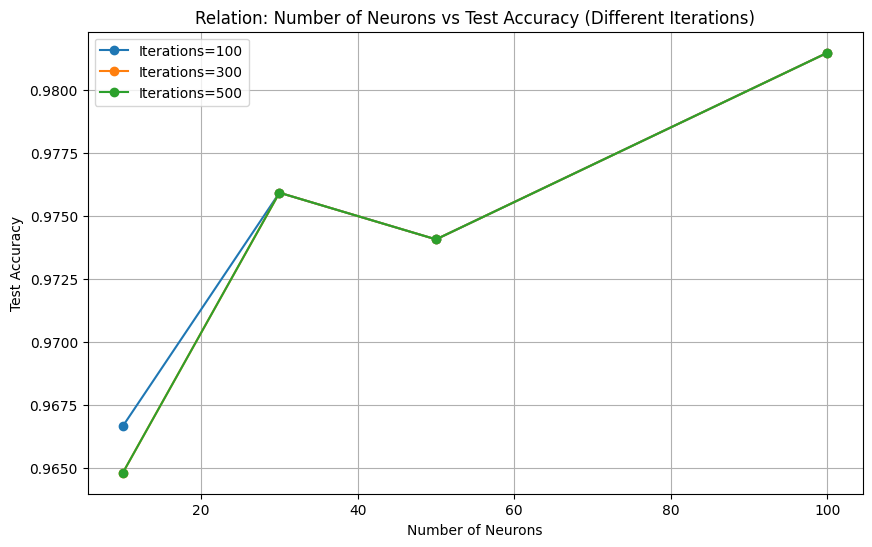

In [10]:
# Finding the relation b/w no. of neurons with different learning rates and iterations  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Loading dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- HYPERPARAMETER RANGES ---
neurons = [10, 30, 50, 100]
learning_rates = [0.001, 0.01, 0.1]
iterations = [100, 300, 500]

# Relation between Number of Neurons and Learning Rate

results_lr = []

for n in neurons:
    for lr in learning_rates:
        clf = MLPClassifier(
            hidden_layer_sizes=(n,),
            learning_rate_init=lr,
            max_iter=300,   # fix iterations
            solver='adam',
            random_state=42
        )
        clf.fit(X_train, y_train)
        train_loss = clf.loss_
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        results_lr.append((n, lr, train_loss, test_acc))

results_lr = np.array(results_lr, dtype=object)

# Neurons vs Loss (for different learning rates)
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = results_lr[results_lr[:,1] == lr]
    plt.plot(subset[:,0], subset[:,2], marker='o', label=f'LR={lr}')
plt.title("Relation: Number of Neurons vs Training Loss (Different Learning Rates)")
plt.xlabel("Number of Neurons")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

# Neurons vs Accuracy (for different learning rates)
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = results_lr[results_lr[:,1] == lr]
    plt.plot(subset[:,0], subset[:,3], marker='o', label=f'LR={lr}')
plt.title("Relation: Number of Neurons vs Test Accuracy (Different Learning Rates)")
plt.xlabel("Number of Neurons")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Relation between Number of Neurons and Iterations

results_it = []

for n in neurons:
    for it in iterations:
        clf = MLPClassifier(
            hidden_layer_sizes=(n,),
            learning_rate_init=0.01,  # fix learning rate
            max_iter=it,
            solver='adam',
            random_state=42
        )
        clf.fit(X_train, y_train)
        train_loss = clf.loss_
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        results_it.append((n, it, train_loss, test_acc))

results_it = np.array(results_it, dtype=object)

# Neurons vs Loss (for different iterations)
plt.figure(figsize=(10, 6))
for it in iterations:
    subset = results_it[results_it[:,1] == it]
    plt.plot(subset[:,0], subset[:,2], marker='o', label=f'Iterations={it}')
plt.title("Relation: Number of Neurons vs Training Loss (Different Iterations)")
plt.xlabel("Number of Neurons")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

# Neurons vs Accuracy (for different iterations)
plt.figure(figsize=(10, 6))
for it in iterations:
    subset = results_it[results_it[:,1] == it]
    plt.plot(subset[:,0], subset[:,3], marker='o', label=f'Iterations={it}')
plt.title("Relation: Number of Neurons vs Test Accuracy (Different Iterations)")
plt.xlabel("Number of Neurons")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()
